In [1]:
import os
print(os.getcwd())

In [2]:
import pandas as pd 
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


In [3]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)
print("data_test.columns:", data_test.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
data_test.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


In [4]:
data.drop(['homepage'],axis=1,inplace=True)

### data["genres"]

In [5]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
def convertAll(data):
    import math
    import datetime

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [7]:
convertAll(data)
convertAll(data_test)


<ipython-input-6-b2a67e616a86>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'][i] = new_date
<ipython-input-6-b2a67e616a86>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"][i]=eval(data["genres"][i])
<ipython-input-6-b2a67e616a86>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["production_countries"][i]=eval(data["production_countries"][i])
<ipython-input-6-b2a67e616a86>:41: SettingWithCop

In [8]:
def get_words (data):
    import math
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [9]:
lyrics_word_split = get_words(data)

print ( lyrics_word_split[3] )

{'all', 'end', 'With', '(Vidya', 'determined', 'missing', 'everyone', 'seem', 'that', 'pregnant', 'rely', 'clues', 'when', 'she', 'realises', 'nothing', 'life.', 'a', 'arrives', 'own', 'seems.', 'Kolkata', 'In', 'the', 'her', 'Balan)', 'at', 'to', 'London', 'exist.', 'months', 'Vidya', 'truth', 'it', 'even', 'about', 'city,', 'what', 'herself', 'child', 'for', 'find', 'She', 'unborn', 'and', 'does', 'is', 'on', 'not', 'except', 'festive', 'search', 'memories', 'husband', 'tries', 'city', 'unravel', 'soaked', 'cost', 'Arnab', 'of', 'reach', 'begins', 'dead', 'lies,', 'from', 'slowly', 'Bagchi', 'him,', 'relentless', 'husband.', 'fragments', 'Seven', 'alone', 'Bagchi.', 'convince', 'in', '-'}


In [10]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [11]:
jaccard(lyrics_word_split[0],lyrics_word_split[123])

0.06896551724137931

In [12]:
def most_similar_jaccard(film_ricerca, lyrics_word_split):
    most_similar_id=1
    jaccard_most_similar=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[2])
    list_size=len(lyrics_word_split)
    current_id=2
    while current_id<list_size:
        current_sim=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

sim_id, sim_value = most_similar_jaccard(0, lyrics_word_split)

In [13]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

data_with_budget.shape: (2188, 22)


Text(0.5, 1.0, 'Revenue based on budget per movie')

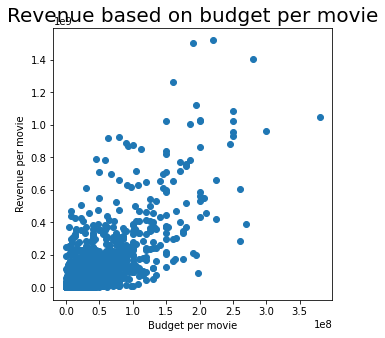

In [14]:
import matplotlib.pyplot as plt
#data_with_budget: array tolti gli elementi con budget = 0
data_with_budget = data[data["budget"] != 0]
print("data_with_budget.shape:", data_with_budget.shape)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 21])

ax.set_xlabel("Budget per movie", fontsize=10)
ax.set_ylabel("Revenue per movie", fontsize=10)
ax.set_title('Revenue based on budget per movie', fontsize=20)

In [15]:
# The number of the beast
sum(data_with_budget['revenue'] <= 10000000)

666

In [16]:
import numpy as np

#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

#matrix budget-revenue
#matrice = [len(data_with_budget)][2]
#br = [data_with_budget['budget'], data_with_budget['revenue']]

#k_means = KMeans(n_clusters=5, n_init=1)
#k_means.fit(br)


#fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(br.iloc[0, :], br.iloc[1, :], c=k_means.labels_)

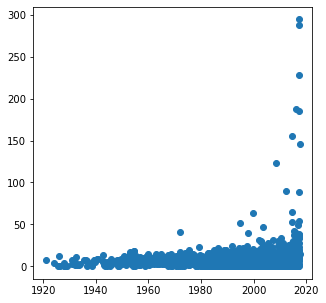

In [17]:
from datetime import datetime
import matplotlib.pyplot as plt

data = data.sort_values(by="release_date")
data["release_date"] = pd.to_datetime(data["release_date"])

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data['release_date'], data['popularity'])


In [18]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_year"]=data["release_date"].dt.year
data_test["release_year"]=data_test["release_date"].dt.year


In [19]:
# Si vuole sviluppare un algoritmo che, in base al genere del film che uscirà, preveda, grazie ai "vicini", quanto potrebbe
# guadagnare al botteghino
# utilizzo dell'algoritmo knn

#out: lista di tutti i generi presenti nel DB
out = []
for lista_generi_per_film in data['genres']:
    if not isinstance(lista_generi_per_film, float):
        for genere in lista_generi_per_film:
            if genere['name'] not in out:
                out.append(genere['name'])
            
print(out)

['Comedy', 'Drama', 'Action', 'Adventure', 'Family', 'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Thriller', 'Crime', 'War', 'Music', 'Western', 'Science Fiction', 'Animation', 'Documentary', 'Foreign', 'TV Movie']


(1960.0, 2021.8)

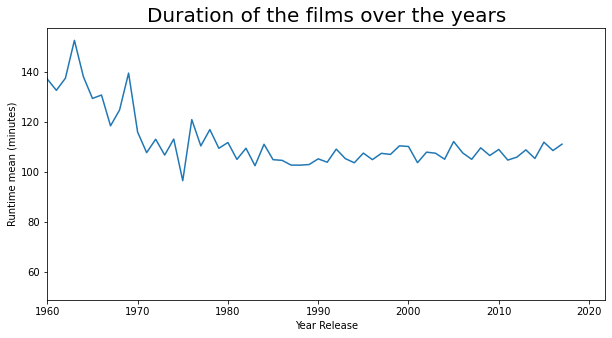

In [20]:
grupByMovies=data['runtime'].groupby(data["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Runtime mean (minutes)", fontsize=10)
x.set_title('Duration of the films over the years', fontsize=20)

#We made the x axis starting from 1960 in previous year there were way few film in order to have a decent graph
x.set_xlim(1960)

In [21]:
#Proviamo a usare l'algoritmo knn applicato su popularity, budget, runtime per predirre la revenue. 
#Visto che i valori hanno un range molto diverso bisogna prima normalizzarli portandoli in un range 0-1
#Usiamo la formula (x-min(x))/(max(x)-min(x))

In [22]:
#creo un funzione che aggiunge una colonna al database con il campo normalizzato

def normalizza(data, campo):
    #data[campo+"Norm"]=(data[campo]-data[campo].min())/(max(data[campo])-min(data[campo]))
    data[campo+"Norm"]=data[campo]
    
normalizza(data,"popularity")
normalizza(data,"budget")
normalizza(data,"runtime")

#DA FIXARE: fillare valori nan con media al posto dello 0
data.runtimeNorm=data.runtimeNorm.fillna(0)

data.isna().sum()
          

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_year                0
popularityNorm              0
budgetNorm                  0
runtimeNorm                 0
dtype: int64

In [23]:
data_test.title=data_test.title.fillna("")


# Male-Female ratio in Disney movies

In [24]:
#trovo tutte le compagnie di produzione dei film e le metto nella lista pc
pc = []
for lista_compagnie in data_test['production_companies']:
    if not isinstance(lista_compagnie, float):
        for compagnia in lista_compagnie:
            if compagnia['name'] not in pc:
                pc.append(compagnia['name'])
            
print(pc)

['Woolner Brothers Pictures Inc.', 'Warner Bros.', 'Outlaw Productions (I)', 'Miramax', 'TS Productions', 'Micro scope', 'Phi Group', 'Castle Rock Entertainment', 'Detour Filmproduction', 'X-Filme Creative Pool', 'ARTE', 'Westdeutscher Rundfunk (WDR)', 'ARD Degeto Film', 'Walt Disney Pictures', 'Ecosse Films', '2 Entertain', 'Bueprint Pictures', 'Pixar Animation Studios', 'Primetime Pictures', 'Emergence Entertainment', 'Canal+', 'Arte France', 'Arte France Cinéma', 'Hold Up Films', 'Ciné+', "Agence Nationale pour la Cohésion Sociale et l'Egalité des Chances (ACSE)", 'Région Ile-de-France', 'Fonds Images de la Diversité', 'Pyramide Distribution', 'Centre National de la Cinématographie (CNC)', 'Films Distribution', 'Lilies Films', 'Arte / Cofinova 9', 'CAT Films', 'Mimosa Films', 'The Weinstein Company', 'Summit Entertainment', 'Endgame Entertainment', 'First Point Entertainment', 'Braeburn Entertainment', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)', 'New Crime Productions', 'Alcon En

In [25]:
#stampo tutti i film che sono stati prodotti dalla Disney e li aggiungo ad una lista
#cerco nelle case di produzione tutte quelle che contengano Disney nel nome
#Walt Disney Pictures
list_Disney=[]

i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if not isinstance(data_test["production_companies"][i], float):
        for compagnia in data_test["production_companies"][i]:
            if not isinstance(compagnia, float):
                if compagnia['name'].find('Disney')!=-1:
                    list_Disney.append(i)
    i+=1
 
print(list_Disney)

[7, 60, 78, 158, 198, 249, 273, 273, 282, 371, 393, 397, 407, 422, 439, 439, 444, 458, 487, 534, 560, 576, 646, 651, 659, 659, 707, 707, 724, 788, 791, 870, 876, 899, 933, 942, 966, 966, 972, 1011, 1060, 1152, 1175, 1179, 1207, 1231, 1255, 1255, 1264, 1266, 1269, 1269, 1270, 1285, 1296, 1299, 1372, 1376, 1388, 1388, 1395, 1550, 1565, 1579, 1589, 1603, 1634, 1705, 1739, 1739, 1826, 1834, 1861, 1861, 1913, 2083, 2150, 2191, 2192, 2235, 2240, 2277, 2279, 2292, 2294, 2294, 2350, 2365, 2432, 2445, 2469, 2469, 2495, 2509, 2603, 2607, 2611, 2616, 2616, 2627, 2659, 2680, 2749, 2824, 2924, 2939, 2939, 2977, 2977, 3034, 3066, 3102, 3212, 3212, 3345, 3345, 3413, 3442, 3445, 3487, 3533, 3613, 3662, 3668, 3691, 3692, 3698, 3700, 3760, 3795, 3914, 3959, 3966, 4053, 4058, 4058, 4123, 4123, 4188, 4211, 4215, 4290, 4366]


In [26]:
#Per ogni membro del cast è indicato il sesso: 1 se donna, 2 se uomo, 0??
data_test['MFRatio']=float('NaN')

maxMF = 0
index=0

for i in list_Disney:
    n_male=1
    n_female=1
    if not isinstance(data_test["cast"][i], float):
        for person in data_test['cast'][i]:
            if person['gender']==1:
                n_female+=1
            elif person['gender']==2:
                n_male+=1    
    data_test['MFRatio'][i]=n_male/n_female
    if data_test['MFRatio'][i] > maxMF:
        maxMF = data_test['MFRatio'][i]
        index=i

print(index)

3760


<ipython-input-26-afa5d08635ea>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['MFRatio'][i]=n_male/n_female


In [27]:
#creo il dataframe con solo i film della Disney
film_Disney=data_test

film_Disney.sort_values(by=['release_date'], ascending = True, inplace = True)

film_Disney=film_Disney.dropna(subset=['MFRatio'])


In [28]:
film_Disney.shape[0]

data_test.isna().sum()


id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       0
Keywords                  393
cast                       13
crew                       22
release_year                1
MFRatio                  4274
dtype: int64

Text(0.5, 1.0, 'Male Female ratio in Disney films')

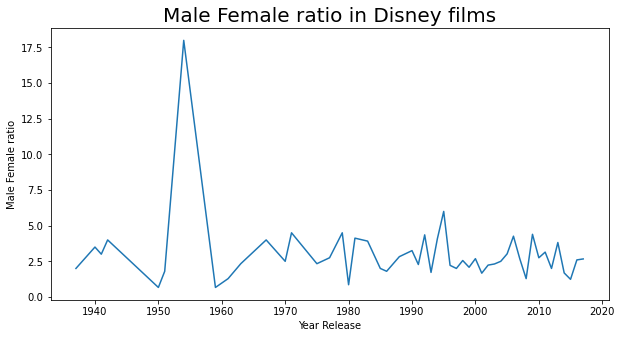

In [29]:
grupByMovies=film_Disney['MFRatio'].groupby(film_Disney["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Male Female ratio", fontsize=10)
x.set_title('Male Female ratio in Disney films', fontsize=20)



Il picco massimo che si nota nel grafico è stato raggiunto dal film "20,000 Leagues Under the Sea", uscito nel 1954, il cui cast era composta da soli attori uomini.

In [30]:
data['production_countries'].isna().sum()

55

In [36]:
data['revenue']

1763      2500000
2992      1213880
1917            1
1361        45100
2680       966878
          ...    
2838     25442939
1695    224511319
1354          422
1715    369907963
2623     90024292
Name: revenue, Length: 3000, dtype: int64

In [49]:
list_Italy=[]

i=0
n_elem = data.shape[0]
while i<n_elem:
    if not isinstance(data["production_countries"][i], float):
        for peasi in data["production_countries"][i]:
            if not isinstance(peasi, float):
                if peasi['name']=='Ukraine':
                    list_Italy.append(i)
    i+=1

In [50]:
index=0
data['Is_ita']=float('NaN')

for i in list_Italy:
    data['Is_ita'][i]=1

data['Is_ita']

<ipython-input-50-9dfee827e025>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Is_ita'][i]=1


1763   NaN
2992   NaN
1917   NaN
1361   NaN
2680   NaN
        ..
2838   NaN
1695   NaN
1354   NaN
1715   NaN
2623   NaN
Name: Is_ita, Length: 3000, dtype: float64

In [53]:
#creo il dataframe con solo i film della Disney
film_Ita=data

film_Ita.sort_values(by=['release_date'], ascending = True, inplace = True)

film_Ita=film_Ita.dropna(subset=['Is_ita'])

film_Ita


,id,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,...,title,Keywords,cast,crew,revenue,release_year,popularityNorm,budgetNorm,runtimeNorm,Is_ita
2154,2155,NaN,3000000,"[{'id': 35, 'name': 'Comedy'}]",tt1124396,ru,Gitler kaput!,A Russian WW2 spy spoof following misadventure...,0.878255,/meZpxinv9EAdoU6Fcjtb8ljL3gR.jpg,...,Hitler's Kaput!,NaN,"[{'cast_id': 2, 'character': '–®—É—Ä–µ–Ω–±–µ—Ä...","[{'credit_id': '52fe4848c3a36847f815fa9d', 'de...",9713500,2008,0.878255,3000000,99.0,1.0
1317,1318,NaN,722083,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",tt3037582,en,Поводир,American boy Peter and blind minstrel Ivan are...,0.817488,/7hs2nA5gE8Nj8yQSfkhEYJJcxyl.jpg,...,The Guide,NaN,"[{'cast_id': 1, 'character': '', 'credit_id': ...","[{'credit_id': '54182fd3c3a36819a4002ddd', 'de...",499168,2014,0.817488,722083,120.0,1.0


Text(0.5, 1.0, 'Male Female ratio in Disney films')

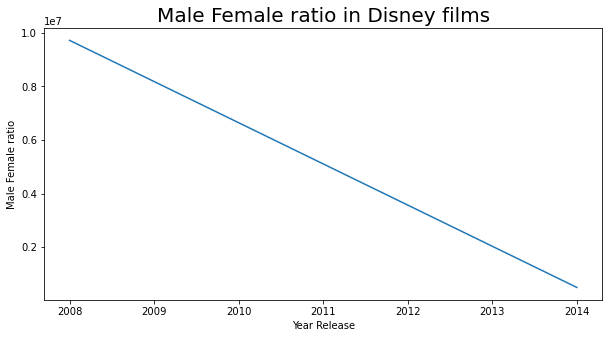

In [52]:
grupByMovies=film_Ita['revenue'].groupby(film_Ita["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Male Female ratio", fontsize=10)
x.set_title('Male Female ratio in Disney films', fontsize=20)